In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

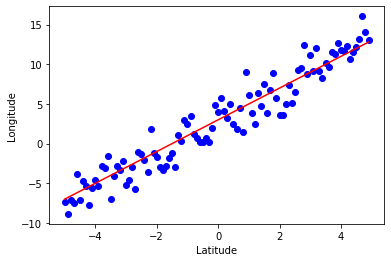

In [2]:
#linear relationship
x=np.arange(-5.0,5.0,0.1)
y=2*(x)+3
y_noise=2*np.random.normal(size=x.size)
ydata=y+y_noise
plt.scatter(x,ydata,color='blue')
plt.plot(x,y,'r')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

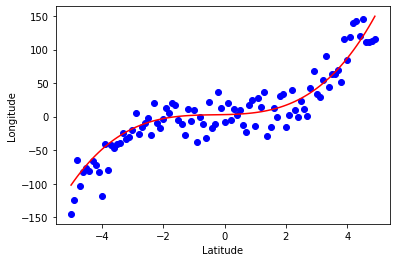

In [3]:
#cubic function graph for non linear relation
x=np.arange(-5.0,5.0,0.1)
y=1*(x**3)+1*(x**2)+1*x+3
y_noise=20*np.random.normal(size=x.size)
ydata=y+y_noise
plt.scatter(x,ydata,color='blue')
plt.plot(x,y,'r')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

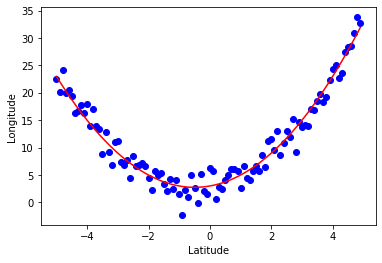

In [4]:
#quadratic function graph for non linear relationship
x=np.arange(-5.0,5.0,0.1)
y=1*(x**2)+1*(x)+3
ydata=2*np.random.normal(size=x.size)
y_noise=y+ydata
plt.scatter(x,y_noise,color='blue')
plt.plot(x,y,'-r')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

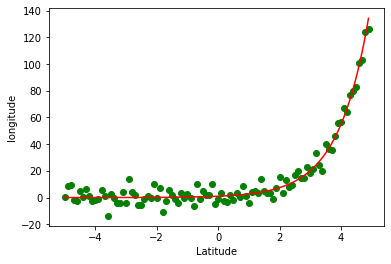

In [5]:
#exponential function graph for non linear relationship
x=np.arange(-5.0,5.0,0.1)
y=np.exp(x)
y_noise=5*np.random.normal(size=x.size)
ydata=y+y_noise
plt.scatter(x,ydata,color="green")
plt.plot(x,y,'-r')
plt.xlabel("Latitude")
plt.ylabel("longitude")
plt.show()

c:\users\wel\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


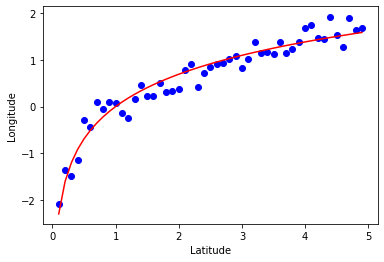

In [6]:
#Logarithmic function for non linear relationship
X=np.arange(-5.0,5.0,0.1)
y=np.log(X)
y_noise=0.2*np.random.normal(size=X.size)
ydata=y+y_noise
plt.scatter(X,ydata,color='blue')
plt.plot(X,y,'-r')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

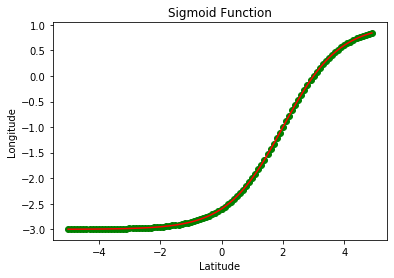

In [7]:
#sigmoid function for non linear relationship
x=np.arange(-5.0,5.0,0.1)
y=1-4/(1+np.power(3,x-2))
plt.scatter(x,y,color='green')
plt.plot(x,y,'-r')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Sigmoid Function")
plt.show()

# NON Linear Relationship

In [2]:
df=pd.read_csv("china_gdp.csv")#loading data into pandas dataframe and saving it in variable df
df[20:25]#for specific rows as slicing
df['Year']#for specific column
df[['Year','Value']]#for multiple columns
df.Year #for specific column
len(df)#total number of rows
df.columns#for column names
df.head()#for first five rows
df.tail()#for last five rows

,Year,Value
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


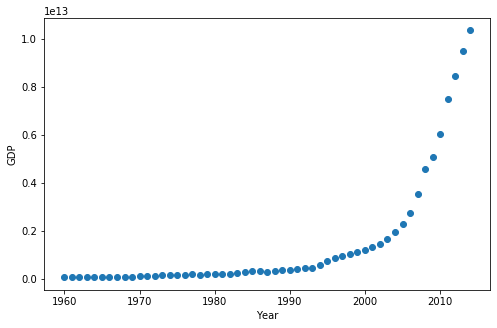

In [3]:
plt.figure(figsize=(8,5))
plt.scatter(df['Year'],df['Value'])
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

In [4]:
def sigmoid(x,Beta_1,Beta_2):
    y=1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return y

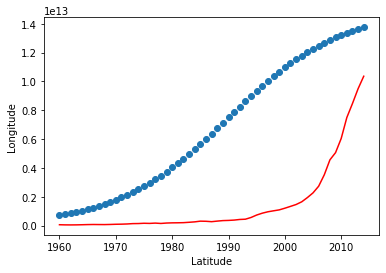

In [5]:
Beta_1=0.10
Beta_2=1990
y_pred=sigmoid(df['Year'],Beta_1,Beta_2)
plt.scatter(df['Year'],y_pred*15000000000000)
plt.plot(df['Year'],df['Value'],'-r')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [6]:
#lets normalize the data
xdata=df['Year']/max(df['Year'])
ydata=df['Value']/max(df['Value'])

In [37]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
popt,pcov =curve_fit(sigmoid,xdata,ydata)
print("Beta_1=%f,Beta_2=%f"%(popt[0],popt[1]))

Beta_1=690.451710,Beta_2=0.997207


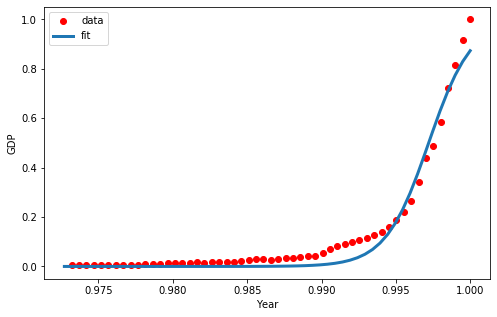

In [18]:
x=np.linspace(1960,2015,55)
x=x/max(x)
plt.figure(figsize=(8,5))
y=sigmoid(x,*popt)
plt.plot(xdata,ydata,'ro',label='data')
plt.plot(x,y,linewidth=3.0,label='fit')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

# Evaluation

In [26]:
mask=np.random.rand(len(df))<0.8
train_x=xdata[mask]
test_x=xdata[~mask]
train_y=ydata[mask]
test_y=ydata[~mask]

In [27]:
popt,pcov=curve_fit(sigmoid,train_x,train_y)

In [28]:
yhat=sigmoid(test_x,*popt)
print(yhat)
print(test_y)

0     6.497068e-08
7     7.089735e-07
8     9.974776e-07
19    4.264724e-05
26    4.651791e-04
36    1.394619e-02
38    2.723390e-02
40    5.250778e-02
41    7.232943e-02
47    3.768418e-01
54    8.684026e-01
Name: Year, dtype: float64
0     0.005716
7     0.006959
8     0.006760
19    0.017080
26    0.028857
36    0.083135
38    0.099014
40    0.116396
41    0.128658
47    0.340237
54    1.000000
Name: Value, dtype: float64


In [42]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat-test_y)))
print("Residual sum of square: %.2f" % np.mean((yhat-test_y)**2))
print("R2-score: %.2f" % r2_score(yhat,test_y))

Mean absolute error: 0.04
Residual sum of square: 0.00
R2-score: 0.95
